# QF620 Part IV

Prathmesh Desai  
Rahul Sreeram  
Srivatsa Mitragotri  
Nandini Agarwal  
Harshita Sachdev  

# Import Library

In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from scipy.stats import norm

# Models

In [57]:
# Brownian Motion
def simulate_Brownian_Motion(paths, steps, T):
    deltaT = T/steps
    t = np.linspace(0, T, steps+1)
    X = np.c_[np.zeros((paths, 1)),
              np.random.randn(paths, steps)]
    return t, np.cumsum(np.sqrt(deltaT) * X, axis=1)

# Black-Scholes Model
def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

# Stock Price Simulation
def StockPrice_Simulation(steps):
    t, Wt = simulate_Brownian_Motion(50000, steps, 1/12)
    t =np.linspace(0,T,steps+1)
    stockprice=S0*np.exp((r-(sigma**2)/2)*t+sigma*Wt)
    return stockprice

# Parameters

In [59]:
np.random.seed(1)

S0 = 100
K = 100
T = 1/12
sigma = 0.2
r = 0.05

N1 = 21
deltaT1 = T/N1

N2 = 84
deltaT2 = T/N2

In [60]:
steps1 = N1
Stockprice1 = StockPrice_Simulation(steps1)

steps2 = N2
Stockprice2 = StockPrice_Simulation(steps2)

# Simulation (N=21)

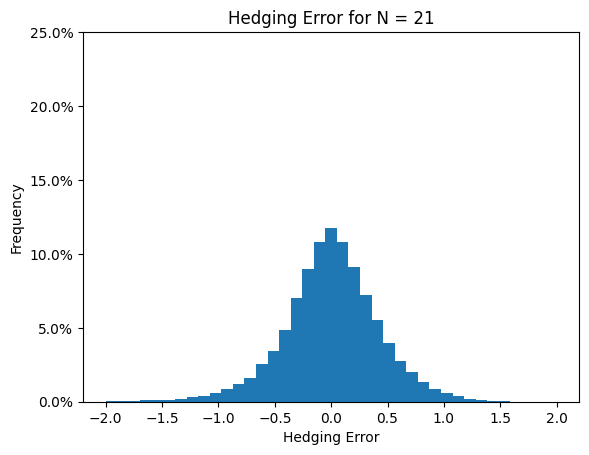

In [62]:
error = 0
t1 = np.linspace(0, T, steps1+1)

for i in range(N1):
    ST = Stockprice1[:,i]
    ST_1 = Stockprice1[:,i+1]
    deltaT1 = T - t1[i]
    changeT = t1[i+1] - t1[i]
    Phi = norm.cdf((np.log(ST/K)+(r+sigma**2/2)*deltaT1) / (sigma*np.sqrt(deltaT1)))
    Bt_Psi = - K*np.exp(-r*deltaT1)*norm.cdf((np.log(ST/K)+(r-sigma**2/2)*deltaT1) / (sigma*np.sqrt(deltaT1)))
    error += (ST_1*Phi+Bt_Psi*np.exp(r*changeT)) - (ST*Phi+Bt_Psi)
    
error = error+BlackScholesCall(S0, K, r, sigma, T)
error = error-np.maximum(Stockprice1[:,N1]-K,0)

plt.hist(error,weights = np.ones(len(error))/len(error), bins = np.linspace(-2,2,40))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Hedging Error for N = 21')
plt.xlabel('Hedging Error')
plt.ylabel('Frequency')
plt.yticks(np.arange(0,0.3,0.05))
plt.show()

In [63]:
C0 = BlackScholesCall(S0, K, r, sigma, T)
print("Error Mean =", error.mean())
print("Error Standard Deviation =", error.std())
print("Error StDev as a % of Option Premium =", error.std()*100/C0)

Error Mean = 0.002430782730383348
Error Standard Deviation = 0.4247032058239902
Error StDev as a % of Option Premium = 16.906523244707927


# Simulation (N=84)

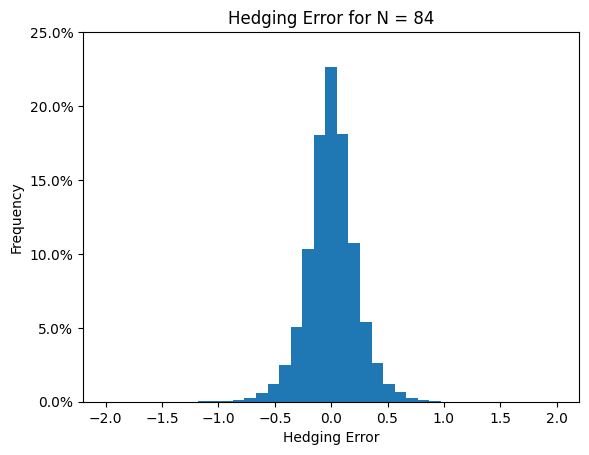

In [65]:
error = 0
t2 = np.linspace(0, T, steps2+1)

for i in range(N2):
    ST = Stockprice2[:,i]
    ST_1 = Stockprice2[:,i+1]
    deltaT2 = T - t2[i]
    changeT = t2[i+1] - t2[i]
    Phi = norm.cdf((np.log(ST/K)+(r+sigma**2/2)*deltaT2) / (sigma*np.sqrt(deltaT2)))
    Bt_Psi = - K*np.exp(-r*deltaT2)*norm.cdf((np.log(ST/K)+(r-sigma**2/2)*deltaT2) / (sigma*np.sqrt(deltaT2)))
    error += (ST_1*Phi+Bt_Psi*np.exp(r*changeT)) - (ST*Phi+Bt_Psi)
    
error=error+BlackScholesCall(S0, K, r, sigma, T)
error=error-np.maximum(Stockprice2[:,N2]-K,0)

plt.hist(error,weights = np.ones(len(error))/len(error), bins = np.linspace(-2,2,40))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Hedging Error for N = 84')
plt.xlabel('Hedging Error')
plt.ylabel('Frequency')
plt.yticks(np.arange(0,0.3,0.05))
plt.show()

In [66]:
C0 = BlackScholesCall(S0, K, r, sigma, T)
print("Error Mean =", error.mean())
print("Error Standard Deviation =", error.std())
print("Error StDev as a % of Option Premium =", error.std()*100/C0)

Error Mean = 0.0009321509401988181
Error Standard Deviation = 0.21776058828491832
Error StDev as a % of Option Premium = 8.668581722799615
